In [1]:
library(dplyr)
library(tidyverse)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT5G41570,WRKY24
AT5G35790,G6PD1


In [3]:
fimo_result <- read_tsv("/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/fimo/all_peaks_DM1_DM2d/fimo.tsv") %>%
    na.omit() 

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 4901104 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): motif_id, motif_alt_id, sequence_name, strand, matched_sequence
dbl (5): start, stop, score, p-value, q-value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
fimo_result <- fimo_result %>% mutate(chr = sequence_name %>% str_extract("^\\d"), 
                       peak_start = sequence_name %>% str_extract("_\\d+_") %>% str_remove_all("_") %>% as.numeric(),
                        peak_end = sequence_name %>% str_extract("_\\d+$") %>% str_remove_all("_") %>% as.numeric()
                      
                      )

In [5]:
fimo_result <-fimo_result %>% left_join(map_id_name, by = c('motif_id' = 'gene_id')) %>% 
    dplyr::rename('motif_name' = 'gene_name') 

In [6]:
fimo_result

motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,chr,peak_start,peak_end,motif_name
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
AT4G38910,MP00480,3_20763098_20763351,1,30,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,3,20763098,20763351,BPC5
AT4G38910,MP00480,3_20763098_20763351,3,32,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,3,20763098,20763351,BPC5
AT4G38910,MP00480,3_20763098_20763351,5,34,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,3,20763098,20763351,BPC5
AT4G38910,MP00480,1_3224480_3224586,7,36,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,1,3224480,3224586,BPC5
AT4G38910,MP00480,1_20807869_20808103,7,36,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,1,20807869,20808103,BPC5
AT4G38910,MP00480,1_20807869_20808103,9,38,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,1,20807869,20808103,BPC5
AT4G38910,MP00480,1_3224480_3224586,9,38,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,1,3224480,3224586,BPC5
AT4G38910,MP00480,1_3224480_3224586,11,40,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,1,3224480,3224586,BPC5
AT4G38910,MP00480,1_20807869_20808103,11,40,+,59,7.5e-19,5.83e-14,AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG,1,20807869,20808103,BPC5


In [7]:
library(stringr)

# Function to parse attributes column in GTF file
parse_attributes <- function(attributes_str) {
  attributes <- strsplit(attributes_str, ";")[[1]]
  attributes <- attributes[attributes != ""]
  attributes_list <- lapply(attributes, function(attr) {
    parts <- strsplit(attr, " ")[[1]]
    key <- parts[1]
    value <- gsub('"', '', paste(parts[-1], collapse = " "))
    return(c(key, value))
  })
  return(matrix(unlist(attributes_list), ncol = 2, byrow = TRUE))
}

# Read GTF file
gtf_file <- '/media/HDD2/Genomes/Ath_Ensembl56/Arabidopsis_thaliana.TAIR10.56.gtf'
df <- read.table(gtf_file, sep = '\t', comment.char = '#', header = FALSE, 
                 col.names = c('seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'))

# Keep only rows where feature is 'gene'
df <- subset(df, feature == 'gene')
df

,seqname,source,feature,start,end,score,strand,frame,attribute
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,araport11,gene,10942648,10944727,.,-,.,gene_id AT1G30814; gene_name AT1G30814; gene_source araport11; gene_biotype protein_coding;
76,1,araport11,gene,29677904,29680757,.,-,.,gene_id AT1G78930; gene_name AT1G78930; gene_source araport11; gene_biotype protein_coding;
96,1,araport11,gene,26964087,26966688,.,+,.,gene_id AT1G71695; gene_name AT1G71695; gene_source araport11; gene_biotype protein_coding;
108,1,araport11,gene,21805932,21807496,.,-,.,gene_id AT1G58983; gene_name AT1G58983; gene_source araport11; gene_biotype protein_coding;
118,1,araport11,gene,4429718,4430965,.,+,.,gene_id AT1G12980; gene_name ESR1; gene_source araport11; gene_biotype protein_coding;
126,1,araport11,gene,17141192,17141771,.,+,.,gene_id AT1G45223; gene_name AT1G45223; gene_source araport11; gene_biotype protein_coding;
134,1,araport11,gene,21061522,21063047,.,-,.,gene_id AT1G56250; gene_name PP2-B14; gene_source araport11; gene_biotype protein_coding;
146,1,araport11,gene,24938500,24938832,.,-,.,gene_id AT1G66852; gene_name AT1G66852; gene_source araport11; gene_biotype protein_coding;
152,1,araport11,gene,26276948,26279255,.,-,.,gene_id AT1G69810; gene_name WRKY36; gene_source araport11; gene_biotype protein_coding;


In [8]:
# Function to extract gene_id from the attribute string
extract_gene_id <- function(attribute) {
  parts <- strsplit(attribute, ";")[[1]]
  gene_id_part <- grep("gene_id", parts, value = TRUE)
  if (length(gene_id_part) > 0) {
    gene_id <- strsplit(gene_id_part, " ")[[1]][2]
    gene_id <- gsub('"', '', gene_id)
    return(gene_id)
  } else {
    return(NA)
  }
}

# Apply the function to extract gene_id and create a new column in df
df$gene_id <- sapply(df$attribute, extract_gene_id)

# Now df has an additional column 'gene_id'
print(head(df))


    seqname    source feature    start      end score strand frame
1         1 araport11    gene 10942648 10944727     .      -     .
76        1 araport11    gene 29677904 29680757     .      -     .
96        1 araport11    gene 26964087 26966688     .      +     .
108       1 araport11    gene 21805932 21807496     .      -     .
118       1 araport11    gene  4429718  4430965     .      +     .
126       1 araport11    gene 17141192 17141771     .      +     .
                                                                                      attribute
1   gene_id AT1G30814; gene_name AT1G30814; gene_source araport11; gene_biotype protein_coding;
76  gene_id AT1G78930; gene_name AT1G78930; gene_source araport11; gene_biotype protein_coding;
96  gene_id AT1G71695; gene_name AT1G71695; gene_source araport11; gene_biotype protein_coding;
108 gene_id AT1G58983; gene_name AT1G58983; gene_source araport11; gene_biotype protein_coding;
118      gene_id AT1G12980; gene_name ESR1; gene_so

In [9]:

df$chromosome <- df$seqname

# Filter for rows with gene_id and gene_name
df <- subset(df, !is.na(gene_id) )

# Select relevant columns
result_df <- df[, c('chromosome', 'gene_id',  'start', 'end', 'strand')]
result_df

,chromosome,gene_id,start,end,strand
,<chr>,<chr>,<int>,<int>,<chr>
1,1,AT1G30814,10942648,10944727,-
76,1,AT1G78930,29677904,29680757,-
96,1,AT1G71695,26964087,26966688,+
108,1,AT1G58983,21805932,21807496,-
118,1,AT1G12980,4429718,4430965,+
126,1,AT1G45223,17141192,17141771,+
134,1,AT1G56250,21061522,21063047,-
146,1,AT1G66852,24938500,24938832,-
152,1,AT1G69810,26276948,26279255,-


In [10]:
result_df %>% filter(gene_id == 'AT1G29720')

chromosome,gene_id,start,end,strand
<chr>,<chr>,<int>,<int>,<chr>
1,AT1G29720,10393659,10399873,-


In [11]:
locater <- function(df, gene_id, upstream=5000, downstream=2000) {
  gene_row <- df %>% filter(gene_id == !! gene_id)
    # print(gene_row)
  if (nrow(gene_row) > 0) {
    row <- gene_row[1,]
    if (row$strand == '+') {
      start <- max(1, row$start - upstream)  # Ensure start is not less than 1
      end <- row$end + downstream
        # print(start)
    
    } else {  # strand is '-'
      start <- max(1, row$start - downstream)  # For '-' strand, adjust the start position
      end <- row$end + upstream                # For '-' strand, adjust the end position
        # print(row$end)
        # print(upstream)
        # print(end)
    }
    return(paste(row$chromosome, start, end, sep = ":"))
  } else {
    return(paste("Gene", gene_id, "not found in the DataFrame."))
  }
}

# Example usage
gene_of_interest <- 'AT1G33560'
region <- locater(result_df, gene_of_interest)
print(paste("Region for", gene_of_interest, ":", region))


[1] "Region for AT1G33560 : 1:12163768:12174119"


In [12]:
region

[1] "1:12163768:12174119"

In [13]:
fimo_df

ERROR: Error in eval(expr, envir, enclos): object 'fimo_df' not found


In [14]:
# Assuming the locater function is already defined as previously

# New function to find fimo_results within a specified region
find_fimo_in_region <- function(fimo_df, region) {
  # Split the region string to get chromosome, start, and end
  region_parts <- strsplit(region, ":|\\-")[[1]]
  chromosome <- region_parts[1]
  region_start <- as.numeric(region_parts[2])
  region_end <- as.numeric(region_parts[3])
  
  # Filter fimo_df for the specific chromosome and check if peaks are within the region
  results_in_region <- fimo_df %>%
    filter(chr == chromosome & 
           peak_start >= region_start & 
           peak_end <= region_end)

  return(results_in_region)
}

# Example usage
gene_of_interest <- 'AT1G33560'
region_of_interest <- locater(result_df, gene_of_interest, upstream=1000, downstream=1)
print(region_of_interest)
# Find fimo results within the region
fimo_in_region <- find_fimo_in_region(fimo_result, region_of_interest)


[1] "1:12167768:12172120"


In [15]:
fimo_in_region <- find_fimo_in_region(fimo_result, "1:12168022:12168509")
fimo_in_region %>% arrange(`p-value`) 

motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,chr,peak_start,peak_end,motif_name
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>


In [16]:
# Add motif_start and motif_end columns to fimo_result
fimo_result <- fimo_result %>%
  mutate(motif_start = start + peak_start - 1,
         motif_end = stop + peak_start - 1)

# Function to find fimo_results within a specified region
find_fimo_in_chromosome <- function(fimo_df, region) {
  # Split the region string to get chromosome, start, and end
  region_parts <- strsplit(region, ":|\\-")[[1]]
  chromosome <- region_parts[1]
  region_start <- as.numeric(region_parts[2])
  region_end <- as.numeric(region_parts[3])
  
  # Filter fimo_df for the specific chromosome and check if motifs are within the region
  results_in_region <- fimo_df %>%
    filter(chr == chromosome & 
           motif_start >= region_start & 
           motif_end <= region_end)

  return(results_in_region)
}

# Example usage
gene_of_interest <- 'AT1G33560'
region_of_interest <- locater(result_df, gene_of_interest, upstream=1000, downstream=1)
print(region_of_interest)

# Find fimo results within the region
fimo_in_region <- find_fimo_in_chromosome(fimo_result, "1:12168087:12168429")



[1] "1:12167768:12172120"


In [17]:
fimo_in_region %>% arrange(`p-value`) %>% mutate(motif_family = motif_name %>% str_remove_all("\\d+")) %>% 
    group_by(motif_family) %>% summarize(count = n()) %>% arrange(desc(count))

motif_family,count
<chr>,<int>
WRKY,69
MYB,27
NAC,18
ERF,7
CUC,4
LOB,4
SHN,4
ATG,3
ANAC,2


In [18]:
#ADR1 
find_fimo_in_chromosome(fimo_result, "1:12168087:12168429") %>% arrange(`p-value`)  %>% filter( `p-value` < 10e-6)

motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,chr,peak_start,peak_end,motif_name,motif_start,motif_end
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
AT1G18570,MP00147,1_12167574_12168743,616,636,+,14.8939,4.30e-06,0.3640,TTTCTCAATTCTTACCTAACA,1,12167574,12168743,MYB51,12168189,12168209
AT4G23550,MP00448,1_12167574_12168743,517,527,+,15.4242,4.30e-06,0.3240,TAAAGTCAACT,1,12167574,12168743,WRKY29,12168090,12168100
AT2G30590,MP00284,1_12167574_12168743,517,527,+,15.0909,4.80e-06,0.3210,TAAAGTCAACT,1,12167574,12168743,WRKY21,12168090,12168100
AT5G52830,MP00561,1_12167574_12168743,517,529,-,14.9545,4.98e-06,0.3410,CTAGTTGACTTTA,1,12167574,12168743,WRKY27,12168090,12168102
AT4G24240,MP00450,1_12167574_12168743,516,529,-,14.3939,5.55e-06,0.3260,CTAGTTGACTTTAA,1,12167574,12168743,WRKY7,12168089,12168102
AT4G01250,MP00422,1_12167574_12168743,517,529,+,14.9091,5.72e-06,0.3380,TAAAGTCAACTAG,1,12167574,12168743,WRKY22,12168090,12168102
AT2G23320,MP00275,1_12167574_12168743,517,527,+,14.6364,6.22e-06,0.3530,TAAAGTCAACT,1,12167574,12168743,WRKY15,12168090,12168100
AT5G24110,MP00525,1_12167574_12168743,518,528,+,15.0909,6.62e-06,0.5190,AAAGTCAACTA,1,12167574,12168743,WRKY30,12168091,12168101
AT3G12720,MP00350,1_12167574_12168743,626,646,-,14.5455,6.74e-06,0.4810,GGTGTTACCGTGTTAGGTAAG,1,12167574,12168743,MYB67,12168199,12168219


In [19]:
library(ggplot2)
library(dplyr)

# Define the region
region_start <- 12168087
region_end <- 12168429
region_length <- region_end - region_start
region_length
# Filter and arrange the fimo_result data
fimo_region <- find_fimo_in_chromosome(fimo_result, "1:12168087:12168429") %>%
  arrange(`p-value`) %>%
  filter(`p-value` < 10e-6) %>%
  mutate(motif_plot_start = motif_start - region_start,
         motif_plot_end = motif_end - region_start)
fimo_region

[1] 342

motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,chr,peak_start,peak_end,motif_name,motif_start,motif_end,motif_plot_start,motif_plot_end
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AT1G18570,MP00147,1_12167574_12168743,616,636,+,14.8939,4.30e-06,0.3640,TTTCTCAATTCTTACCTAACA,1,12167574,12168743,MYB51,12168189,12168209,102,122
AT4G23550,MP00448,1_12167574_12168743,517,527,+,15.4242,4.30e-06,0.3240,TAAAGTCAACT,1,12167574,12168743,WRKY29,12168090,12168100,3,13
AT2G30590,MP00284,1_12167574_12168743,517,527,+,15.0909,4.80e-06,0.3210,TAAAGTCAACT,1,12167574,12168743,WRKY21,12168090,12168100,3,13
AT5G52830,MP00561,1_12167574_12168743,517,529,-,14.9545,4.98e-06,0.3410,CTAGTTGACTTTA,1,12167574,12168743,WRKY27,12168090,12168102,3,15
AT4G24240,MP00450,1_12167574_12168743,516,529,-,14.3939,5.55e-06,0.3260,CTAGTTGACTTTAA,1,12167574,12168743,WRKY7,12168089,12168102,2,15
AT4G01250,MP00422,1_12167574_12168743,517,529,+,14.9091,5.72e-06,0.3380,TAAAGTCAACTAG,1,12167574,12168743,WRKY22,12168090,12168102,3,15
AT2G23320,MP00275,1_12167574_12168743,517,527,+,14.6364,6.22e-06,0.3530,TAAAGTCAACT,1,12167574,12168743,WRKY15,12168090,12168100,3,13
AT5G24110,MP00525,1_12167574_12168743,518,528,+,15.0909,6.62e-06,0.5190,AAAGTCAACTA,1,12167574,12168743,WRKY30,12168091,12168101,4,14
AT3G12720,MP00350,1_12167574_12168743,626,646,-,14.5455,6.74e-06,0.4810,GGTGTTACCGTGTTAGGTAAG,1,12167574,12168743,MYB67,12168199,12168219,112,132


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


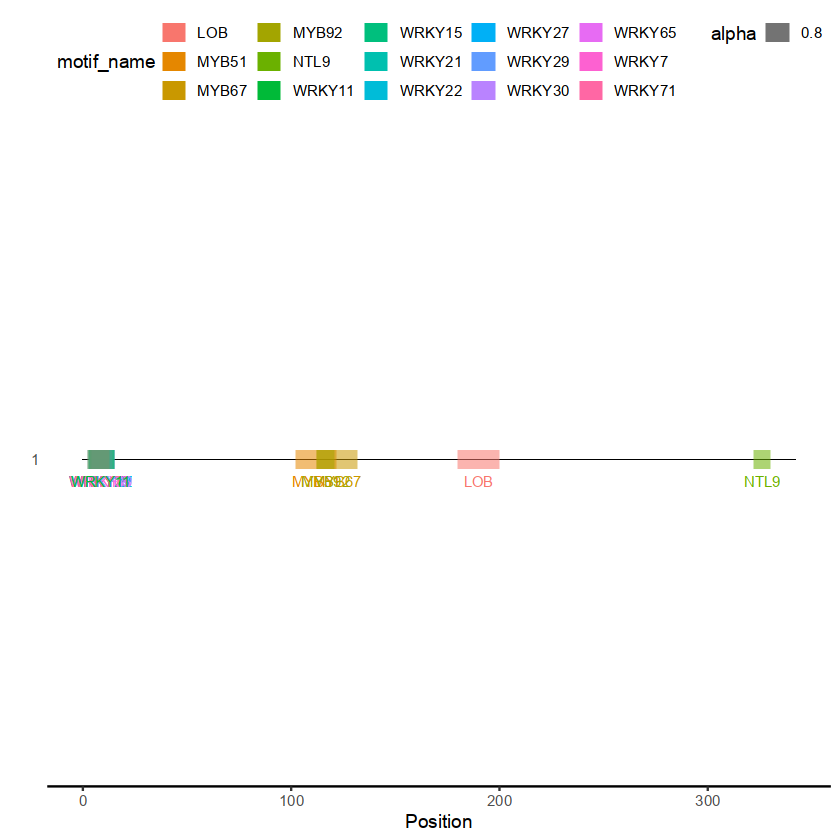

In [20]:
# Define a dataframe for the base region
base_region <- data.frame(
  chr = unique(fimo_region$chr),
  ymin = 0,
  ymax = region_length
)

# Base plot for the genomic region using geom_rect
ps <- ggplot() +
  geom_rect(data = base_region, aes(xmin = chr, xmax = chr, ymin = ymin, ymax = ymax), fill = "black") +
  coord_flip() +
  labs(x = "", y = "Position") +
  ylim(0, region_length)

# Add motif segments
ps1 <- ps +
  geom_segment(data = fimo_region, aes(x = chr, xend = chr, y = motif_plot_start, yend = motif_plot_end, color = motif_name, alpha = 0.8), size = 4) +
  geom_text(data = fimo_region, aes(x = chr, y = (motif_plot_start + motif_plot_end) / 2, label = motif_name, color = motif_name), size = 3, vjust = 2.5) +
  theme_classic() +
  theme(axis.ticks.y = element_blank(), axis.line.y = element_blank()) +
  theme(legend.position = "top")

ps1
ggsave("./motifs_plot/AT1G33560.pdf", width = 3, height = 6, dpi = 300)

In [21]:
LRR BAM2 3:18,420,233-18,422,196

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: LRR BAM2
        ^


In [ ]:
fimo_bam2 <- find_fimo_in_chromosome(fimo_result, "3:18421368-18421809")

In [ ]:
fimo_bam2 %>% arrange(`p-value`)  %>% head(30)

In [ ]:
ER 2:11206183-11215971

In [ ]:
fimo_er <- find_fimo_in_chromosome(fimo_result, "2:11214126-11214606")

In [ ]:
fimo_er %>% arrange(`p-value`)  %>% filter( `p-value` < 10e-6)

In [ ]:
# AT1G60800_NIK3

In [ ]:
find_fimo_in_chromosome(fimo_result, "1:22387955-22388548") %>%  arrange(`p-value`)  %>% filter( `p-value` < 10e-6)

In [ ]:
# Define the region
region_start <- 22387975
region_end <- 22388350
region_length <- region_end - region_start
region_length
# Filter and arrange the fimo_result data
fimo_region <- find_fimo_in_chromosome(fimo_result, "1:22387975:22388350") %>%
  arrange(`p-value`) %>%
  filter(`p-value` < 10e-6) %>%
  mutate(motif_plot_start = motif_start - region_start,
         motif_plot_end = motif_end - region_start) %>% as.data.frame() 
fimo_region

In [ ]:
fimo_region <- fimo_region %>%
  filter(str_detect(motif_name, "DOF|HB|AP")) %>%
  distinct(motif_name, .keep_all = TRUE)

In [ ]:
# Define a dataframe for the base region
base_region <- data.frame(
  chr = unique(fimo_region$chr),
  ymin = 0,
  ymax = region_length
)

# Base plot for the genomic region using geom_rect
ps <- ggplot() +
  geom_rect(data = base_region, aes(xmin = chr, xmax = chr, ymin = ymin, ymax = ymax), fill = "black") +
  coord_flip() +
  labs(x = "", y = "Position") +
  ylim(0, region_length)

# Add motif segments
ps1 <- ps +
  geom_segment(data = fimo_region, aes(x = chr, xend = chr, y = motif_plot_start, yend = motif_plot_end, color = motif_name, alpha = 0.8), size = 4) +
  geom_text(data = fimo_region, aes(x = chr, y = (motif_plot_start + motif_plot_end) / 2, label = motif_name, color = motif_name), size = 3, vjust = 2.5) +
  theme_classic() +
  theme(axis.ticks.y = element_blank(), axis.line.y = element_blank()) +
  theme(legend.position = "top")

ps1
ggsave("./motifs_plot/AT1G60800_NIK3_motif.pdf", width = 3, height = 6, dpi = 300)

In [ ]:
#LRR# AT4G20940
find_fimo_in_chromosome(fimo_result, "4:11201076-11202384") %>%  arrange(`p-value`)  %>% filter( `p-value` < 10e-6)

In [ ]:
#TIR AT1G57630_AT1G57630
find_fimo_in_chromosome(fimo_result, "1:21345044-21345632") %>%  arrange(`p-value`)  

In [ ]:
# TNL AT5G41740
find_fimo_in_chromosome(fimo_result, "5:16687467-16688889") %>%  arrange(`p-value`)  %>% filter( `p-value` < 10e-6)